In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load data
users = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
user_engagement = pd.read_csv('takehome_user_engagement.csv')
user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
users.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [6]:
users.isnull().sum() # 12000 rows

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [7]:
users.drop(columns=['invited_by_user_id'], inplace=True)

In [8]:
users.dropna(inplace=True)

In [9]:
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'])

In [10]:
users.dtypes

object_id                              int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
dtype: object

In [11]:
user_engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [12]:
user_engagement['time_stamp'] = pd.to_datetime(user_engagement['time_stamp'])
user_engagement.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [13]:
user_engagement['time_stamp'] = user_engagement['time_stamp'].dt.date  # ignore times
user_engagement['time_stamp'].head()

0    2014-04-22
1    2013-11-15
2    2013-11-29
3    2013-12-09
4    2013-12-25
Name: time_stamp, dtype: object

In [21]:
from datetime import timedelta
def logins(df):
    df = df.drop_duplicates(subset='time_stamp').sort_values(by='time_stamp')
    days_passed = df['time_stamp'].diff(periods = 2)
    return any(days_passed <= timedelta(days=7))  

In [29]:
adopted_user = user_engagement.groupby('user_id').apply(logins)
print('number of adopted users: ', sum(adopted_user))
print('adoption rate: ', round((sum(adopted_user) / len(adopted_user)) * 100, 2), '%')

number of adopted users:  1656
adoption rate:  18.77 %


In [39]:
users1 = users.drop(columns=['creation_time', 'name', 'email', 'last_session_creation_time']) # drop non-numerical col
adopted_user = [int(x) for x in adopted_user] # bool to int
users1['adopted_user'] = adopted_user # new col
users1.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user
0,1,GUEST_INVITE,1,0,11,0
1,2,ORG_INVITE,0,0,1,1
2,3,ORG_INVITE,0,0,94,0
3,4,GUEST_INVITE,0,0,1,0
4,5,GUEST_INVITE,0,0,193,0


In [40]:
users1 = pd.get_dummies(users1)
users1.head()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted_user,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,1,0,11,0,1,0,0,0,0
1,2,0,0,1,1,0,1,0,0,0
2,3,0,0,94,0,0,1,0,0,0
3,4,0,0,1,0,1,0,0,0,0
4,5,0,0,193,0,1,0,0,0,0


In [42]:
from sklearn.model_selection import train_test_split

X = users1.drop(columns=['adopted_user'])
y = users1['adopted_user']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
clf.score(X_test, y_test)

0.7631280695126559

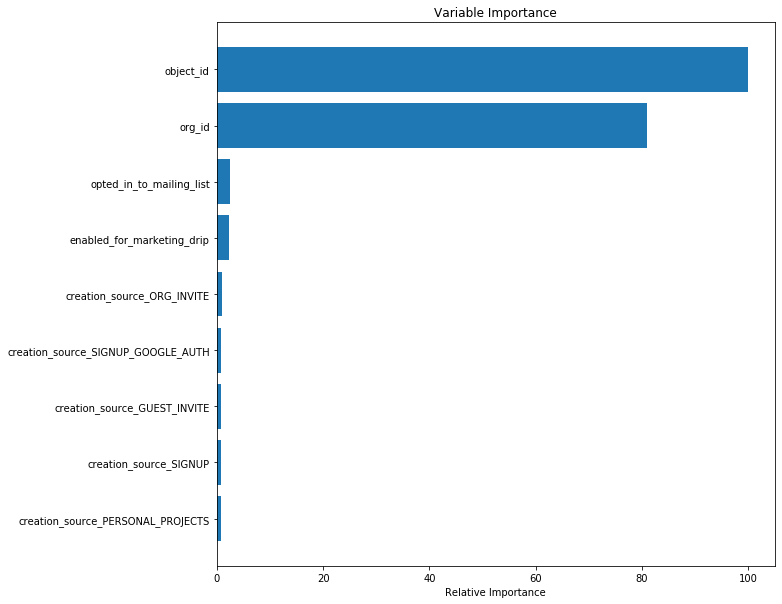

In [46]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:20]
sorted_idx = np.argsort(feature_importance)[:20]

pos = np.arange(sorted_idx.shape[0]) + .5
#print(pos.size)
sorted_idx.size

plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()